# Plateforme Agnostique de Traitement et d'Analyse des Textes
### Carnet d'expérimentation
---

## Sujet : Analyse des tests d'objectivité

---

# Initialisations

In [1]:
cd ../..

/Volumes/Geek/Work/Patat


In [2]:
import importlib
import pandas as pd
import seaborn as sns

# Chargement compilation des tests

In [3]:
filename = 'data/tmp/230612-CompilationLabels.csv'

In [4]:
df_obs = pd.read_csv(filename,decimal=',')

In [5]:
df_obs[df_obs['infox'].isna()]

,source,observateur,url,infox,entites_nommees,ouverture_esprit,faits,opinions,propos_raportes,sources_citees,fausse_nouvelle,insinuations,exageration,inverifiable,titre_decale,cherry_picking,justification infox,remarque observatoire,commentaire,remarque


# Duplications (url,observateur)

In [33]:
df_dup = df_obs[df_obs.duplicated(subset=['url','observateur'],keep=False)].sort_values(['url','observateur'])
df_dup.to_csv('data/tmp/230612-LabelsDupliques.csv',decimal=',')

In [7]:
df_dup.shape

(22, 20)

# Vue globale par observateur

In [8]:
df_fb = df_obs[df_obs['observateur']=='FB'][['source','url','infox']]

In [9]:
df_fb = df_fb.rename(columns={'infox':'infox_fb'})

In [10]:
df_fb

,source,url,infox_fb
0,Recueil,https://www.alnas.fr/actualite/communaute/lara...,0.0
1,Recueil,https://www.alnas.fr/actualite/en-vrac/quel-ar...,0.0
2,Recueil,https://www.alnas.fr/actualite/politique/laust...,0.0
3,Recueil,https://www.alnas.fr/actualite/communaute/nant...,0.0
4,Recueil,https://www.alnas.fr/actualite/en-vrac/la-fran...,0.0
...,...,...,...
1298,TestRecueil,https://reseauinternational.net/pourquoi-les-e...,0.0
1299,TestRecueil,https://ripostelaique.com/le-racisme-anti-blan...,0.0
1300,TestRecueil,https://www.voltairenet.org/article217542.html,0.0
1301,TestRecueil,https://www.voltairenet.org/article217568.html,0.0


In [11]:
df_gp = df_obs[df_obs['observateur']=='GP'][['source','url','infox']]

In [12]:
df_gp = df_gp.rename(columns={'infox':'infox_gp'})

In [13]:
df_gp

,source,url,infox_gp
101,Recueil,https://www.fdesouche.com/2022/07/07/paris-arm...,0.0
161,Recueil,https://www.francesoir.fr/opinions-editos/de-l...,0.0
206,Recueil,https://www.francesoir.fr/opinions-entretiens/...,1.0
222,Recueil,https://infodujour.fr/societe/55967-covid-19-l...,1.0
223,Recueil,https://infodujour.fr/sante/58524-covid-19-les...,1.0
...,...,...,...
1347,TestRecueil,https://www.wikistrike.com/2022/06/irak-decouv...,0.0
1348,TestRecueil,https://www.wikistrike.com/2022/07/n-ecrasez-p...,0.0
1349,TestRecueil,https://www.wikistrike.com/2022/09/les-command...,1.0
1350,TestRecueil,https://www.wikistrike.com/2022/10/la-pologne-...,1.0


In [14]:
df_ll = df_obs[df_obs['observateur']=='LL'][['source','url','infox']]

In [15]:
df_ll = df_ll.rename(columns={'infox':'infox_ll'})

In [16]:
df_ll

,source,url,infox_ll
718,WorkshopObs,https://fr.sott.net/article/39277-Les-embaumeu...,1.0
915,Test2,https://www.lelibrepenseur.org/effondrement-de...,1.0
918,Test2,https://lemediaen442.fr/ivan-rioufol-castex-no...,0.0
921,Test2,https://www.francetvinfo.fr/les-jeux-olympique...,0.0
924,Test2,https://www.francetvinfo.fr/replay-radio/expli...,0.0
...,...,...,...
1217,WorkshopObs,https://www.francesoir.fr/politique-france/rev...,0.0
1220,WorkshopObs,https://fr.sott.net/article/39818-Les-racines-...,1.0
1223,WorkshopObs,https://www.profession-gendarme.com/avertissem...,1.0
1226,WorkshopObs,https://www.profession-gendarme.com/australie-...,0.0


In [17]:
df_fb_gp = df_fb.merge(df_gp,on='url',how='inner')
df_fb_gp

,source_x,url,infox_fb,source_y,infox_gp
0,Recueil,https://www.anguillesousroche.com/internet/rev...,1.0,TestRecueil,1.0
1,Recueil,https://www.breizh-info.com/2022/02/23/180457/...,1.0,TestRecueil,1.0
2,Recueil,https://www.breizh-info.com/2022/05/09/186196/...,0.0,TestRecueil,0.0
3,Recueil,https://www.breizh-info.com/2022/06/13/187989/...,1.0,TestRecueil,1.0
4,Recueil,https://www.breizh-info.com/2022/08/25/207089/...,0.0,TestRecueil,0.0
...,...,...,...,...,...
303,TestRecueil,https://reseauinternational.net/pourquoi-les-e...,0.0,Recueil,0.0
304,TestRecueil,https://ripostelaique.com/le-racisme-anti-blan...,0.0,Recueil,0.0
305,TestRecueil,https://www.voltairenet.org/article217542.html,0.0,Recueil,1.0
306,TestRecueil,https://www.voltairenet.org/article217568.html,0.0,Recueil,1.0


In [18]:
df_fb_ll = df_fb.merge(df_ll,on='url',how='inner')
df_fb_ll

,source_x,url,infox_fb,source_y,infox_ll
0,Recueil,https://www.francesoir.fr/politique-france/rev...,1.0,WorkshopObs,0.0
1,WorkshopObs,https://www.francesoir.fr/politique-france/rev...,0.0,WorkshopObs,0.0
2,Recueil,https://www.francesoir.fr/societe-sante/nouvea...,0.0,Test2,1.0
3,Test2,https://www.francesoir.fr/societe-sante/nouvea...,1.0,Test2,1.0
4,Test1,https://fr.sott.net/article/39277-Les-embaumeu...,1.0,WorkshopObs,1.0
...,...,...,...,...,...
105,WorkshopObs,https://www.wikistrike.com/2021/12/angleterre-...,1.0,WorkshopObs,1.0
106,WorkshopObs,https://fr.sott.net/article/39818-Les-racines-...,1.0,WorkshopObs,1.0
107,WorkshopObs,https://www.profession-gendarme.com/avertissem...,1.0,WorkshopObs,1.0
108,WorkshopObs,https://www.profession-gendarme.com/australie-...,0.0,WorkshopObs,0.0


In [19]:
df_gp_ll = df_gp.merge(df_ll,on='url',how='inner')
df_gp_ll

,source_x,url,infox_gp,source_y,infox_ll
0,Test1,https://fr.sott.net/article/39277-Les-embaumeu...,1.0,WorkshopObs,1.0
1,WorkshopObs,https://fr.sott.net/article/39277-Les-embaumeu...,1.0,WorkshopObs,1.0
2,Test2,https://www.lelibrepenseur.org/effondrement-de...,1.0,Test2,1.0
3,Test2,https://lemediaen442.fr/ivan-rioufol-castex-no...,0.0,Test2,0.0
4,Test2,https://www.francetvinfo.fr/les-jeux-olympique...,0.0,Test2,0.0
...,...,...,...,...,...
102,WorkshopObs,https://www.wikistrike.com/2021/12/angleterre-...,1.0,WorkshopObs,1.0
103,WorkshopObs,https://fr.sott.net/article/39818-Les-racines-...,1.0,WorkshopObs,1.0
104,WorkshopObs,https://www.profession-gendarme.com/avertissem...,1.0,WorkshopObs,1.0
105,WorkshopObs,https://www.profession-gendarme.com/australie-...,0.0,WorkshopObs,0.0


# Metriques

### Confusion matrix
| |Real 0|Real 1|
-|-|-
|Predicted 0| **TN** True Negative | **FN** False Negative |
|Predicted 1| **FP** False Positive| **TP** True Positive |


### Statdard metrics
\begin{equation*} \text{Accuracy} = \frac{TP+TN}{Total} \end{equation*}

\begin{equation*} \text{Recall} = \frac{TP}{TP+FN} \end{equation*}

\begin{equation*} \text{F1-score} = \frac{TP}{TP+\frac{1}{2}(FN+FP) } \end{equation*}

In [20]:
from sklearn import metrics

In [21]:
results_fb_gp = {}
results_fb_gp['accuracy']=metrics.accuracy_score(df_fb_gp['infox_fb'], df_fb_gp['infox_gp'])
results_fb_gp['recall']=metrics.recall_score(df_fb_gp['infox_fb'], df_fb_gp['infox_gp'])
results_fb_gp['f1']=metrics.f1_score(df_fb_gp['infox_fb'], df_fb_gp['infox_gp'])
cnf_matrix = metrics.confusion_matrix(df_fb_gp['infox_fb'], df_fb_gp['infox_gp'],normalize='all')
results_fb_gp['false_positive']=cnf_matrix[0,1]
results_fb_gp['false_negative']=cnf_matrix[1,0]
cnf_matrix

array([[0.64935065, 0.09415584],
       [0.02597403, 0.23051948]])

In [22]:
results_fb_gp

{'accuracy': 0.8798701298701299,
 'recall': 0.8987341772151899,
 'f1': 0.7932960893854749,
 'false_positive': 0.09415584415584416,
 'false_negative': 0.025974025974025976}

In [23]:
results_fb_ll = {}
results_fb_ll['accuracy']=metrics.accuracy_score(df_fb_ll['infox_fb'], df_fb_ll['infox_ll'])
results_fb_ll['recall']=metrics.recall_score(df_fb_ll['infox_fb'], df_fb_ll['infox_ll'])
results_fb_ll['f1']=metrics.f1_score(df_fb_ll['infox_fb'], df_fb_ll['infox_ll'])
cnf_matrix = metrics.confusion_matrix(df_fb_ll['infox_fb'], df_fb_ll['infox_ll'],normalize='all')
results_fb_ll['false_positive']=cnf_matrix[0,1]
results_fb_ll['false_negative']=cnf_matrix[1,0]
cnf_matrix

array([[0.75454545, 0.01818182],
       [0.06363636, 0.16363636]])

In [24]:
results_fb_ll

{'accuracy': 0.9181818181818182,
 'recall': 0.72,
 'f1': 0.7999999999999999,
 'false_positive': 0.01818181818181818,
 'false_negative': 0.06363636363636363}

In [25]:
results_gp_ll = {}
results_gp_ll['accuracy']=metrics.accuracy_score(df_gp_ll['infox_gp'], df_gp_ll['infox_ll'])
results_gp_ll['recall']=metrics.recall_score(df_gp_ll['infox_gp'], df_gp_ll['infox_ll'])
results_gp_ll['f1']=metrics.f1_score(df_gp_ll['infox_gp'], df_gp_ll['infox_ll'])
cnf_matrix = metrics.confusion_matrix(df_gp_ll['infox_gp'], df_gp_ll['infox_ll'],normalize='all')
results_gp_ll['false_positive']=cnf_matrix[0,1]
results_gp_ll['false_negative']=cnf_matrix[1,0]
cnf_matrix

array([[0.76635514, 0.02803738],
       [0.05607477, 0.14953271]])

In [26]:
results_gp_ll

{'accuracy': 0.9158878504672897,
 'recall': 0.7272727272727273,
 'f1': 0.7804878048780488,
 'false_positive': 0.028037383177570093,
 'false_negative': 0.056074766355140186}

In [27]:
pd.set_option('display.precision',3)

In [28]:
df_result = pd.DataFrame([results_fb_gp,results_fb_ll,results_gp_ll],index=['fb-gp','fb-ll','gp-ll'])
df_result

,accuracy,recall,f1,false_positive,false_negative
fb-gp,0.880,0.899,0.793,0.094,0.026
fb-ll,0.918,0.720,0.800,0.018,0.064
gp-ll,0.916,0.727,0.780,0.028,0.056


/var/folders/fr/mhrqmk5n1xs49b7jl3tgs2r00000gn/T/ipykernel_34394/3270522640.py:2: UserWarning: 
The markers list has fewer values (1) than needed (3) and will cycle, which may produce an uninterpretable plot.
  sns.scatterplot(data=df_result[['accuracy','f1','recall']],s=20,markers='o')


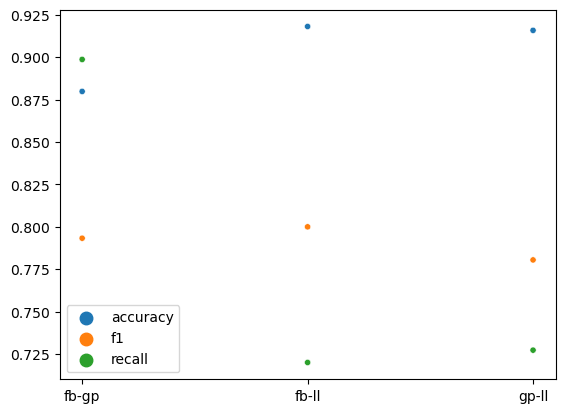

In [32]:
import matplotlib.pyplot as plt
sns.scatterplot(data=df_result[['accuracy','f1','recall']],s=20,markers='o')
#plt.grid()
plt.legend(markerscale=1.5)

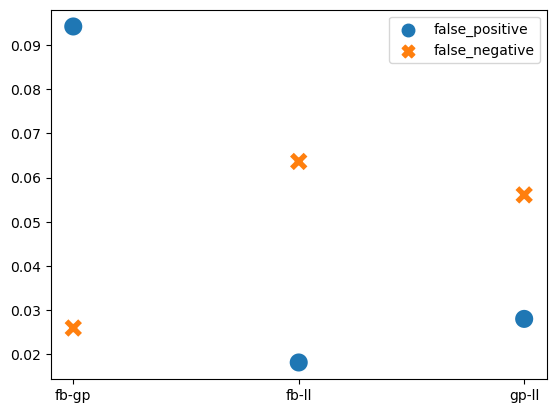

In [30]:
import matplotlib.pyplot as plt
sns.scatterplot(data=df_result[['false_positive','false_negative']],s=200)
plt.legend(markerscale=1.5)

# Sauvegarde des résultats
---

# Conclusions
---

# Bricolages
---